<img src="./logo_UTN.svg" align="right" width="150" />

#### Procesamiento Digital de Señales
# TS6: Ventanas
#### Eloy Silva

### Configuración e inicio de la simulación

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,7)

import warnings
warnings.filterwarnings('ignore')
 
N = 1000    #Cantidad de muestras
fs = N
R = 200     #Cantidad de realizaciones

a1 = 2      #Amplitud de la señal original

fr = np.random.uniform(-2, 2, R)
w0 = N/4
w1 = w0 + fr          #Frecuencia de señal

k = np.arange(0, N/fs, 1/fs)        #Vector de tiempo

x = np.zeros((N, R))
w_blackman = np.zeros((N, R))
w_flattop = np.zeros((N, R))

### Generación de señal analógica y ventanas. Cálculo de Espectros.

(225.0, 275.0)

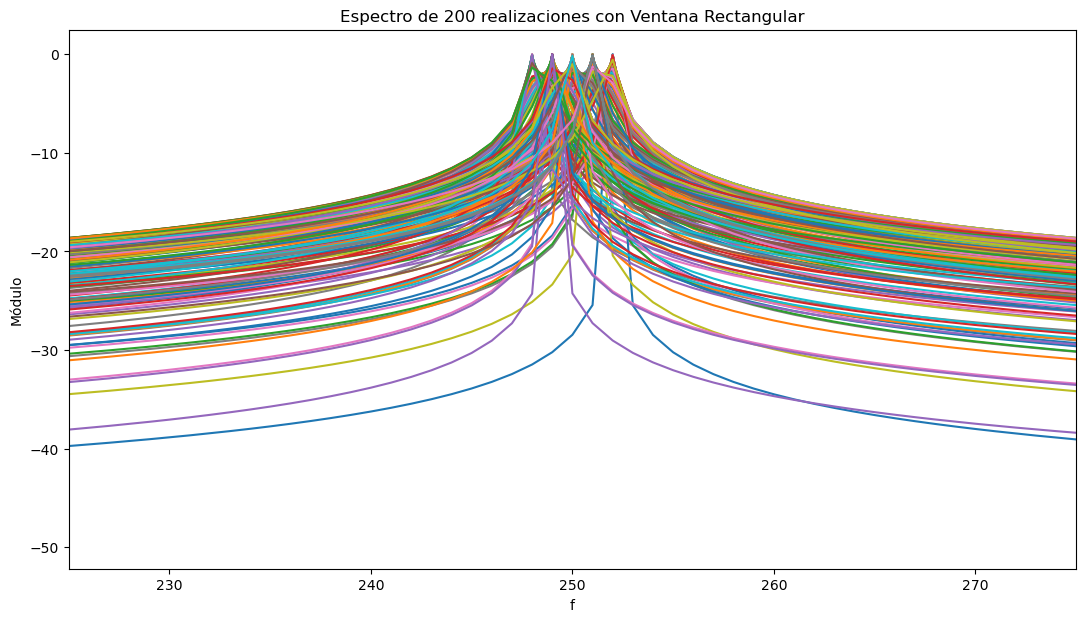

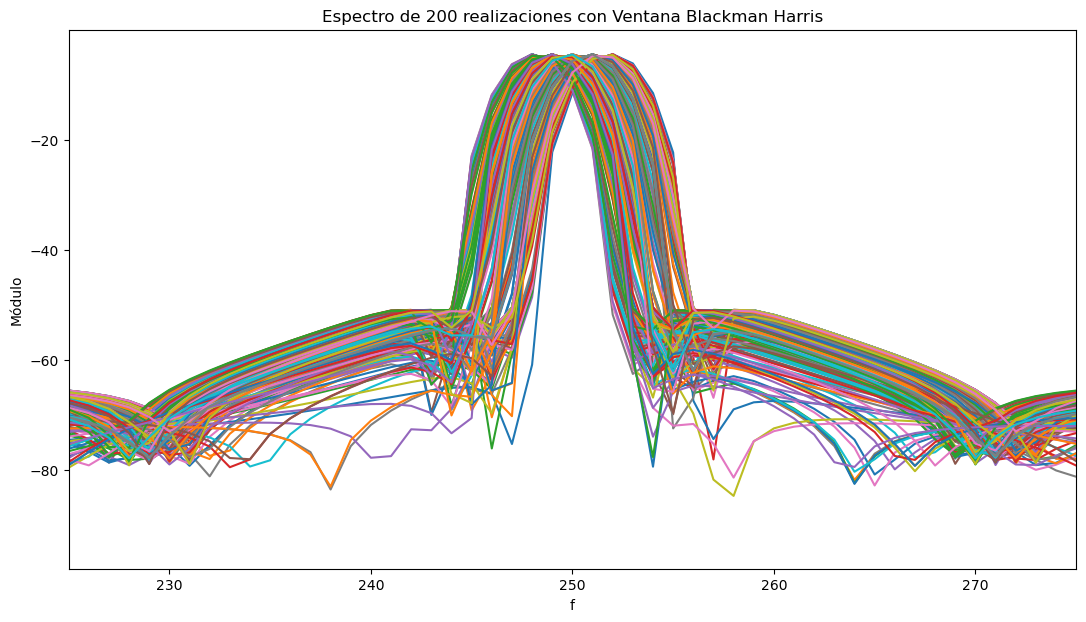

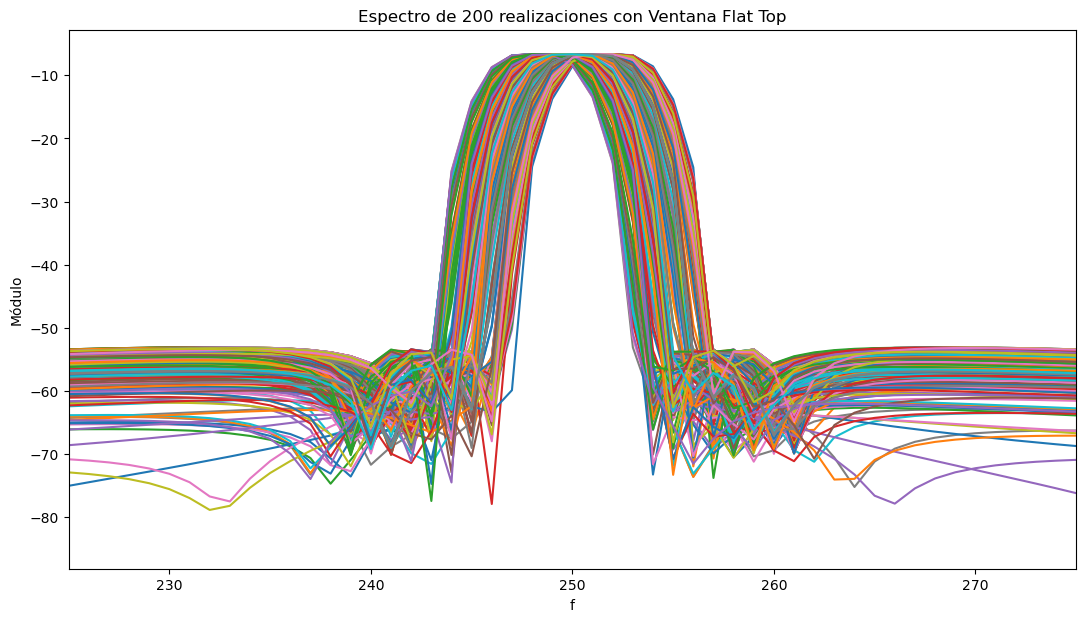

In [12]:
for i in range(R):
    W = w1[i]
    x[:, i] = a1*np.sin(2*np.pi*W*k)                        #Generación de señal senoidal
        
    w_blackman[:, i] = sp.signal.windows.blackmanharris(N)  #Ventana Blackman Harris
    w_flattop[:, i] = sp.signal.windows.flattop(N)          #Ventana Flat Top

f = np.arange(0, fs, 1)                               #Vector de frecuencias
ft_X_rect = np.fft.fft(x, axis=0)/N                   #Espectro ventana rectangular
ft_X_blackman = np.fft.fft(x*w_blackman, axis=0)/N    #Espectro ventana Blackman Harris
ft_X_flattop = np.fft.fft(x*w_flattop, axis=0)/N      #Espectro ventana Flat Top

plt.figure()
plt.plot(f, 10*np.log10(np.abs(ft_X_rect)))
plt.title('Espectro de 200 realizaciones con Ventana Rectangular')
plt.ylabel('Módulo')
plt.xlabel('f')
plt.xlim(225, 275)

plt.figure()
plt.plot(f, 10*np.log10(np.abs(ft_X_blackman)))
plt.title('Espectro de 200 realizaciones con Ventana Blackman Harris')
plt.ylabel('Módulo')
plt.xlabel('f')
plt.xlim(225, 275)

plt.figure()
plt.plot(f, 10*np.log10(np.abs(ft_X_flattop)))
plt.title('Espectro de 200 realizaciones con Ventana Flat Top')
plt.ylabel('Módulo')
plt.xlabel('f')
plt.xlim(225, 275)

### Cálculo de estimador de Módulo para las diferentes Ventanas.

Sesgo ventana rectangular: -1.3025533590838823
Varianza ventana rectangular: 0.4101464484948373

Sesgo ventana Blackman Harris: -1.536940393989501
Varianza ventana Blackman Harris: 0.034240113957910205

Sesgo ventana Flat Top: -1.6066410357564744
Varianza ventana Flat Top: 0.001968808623396392



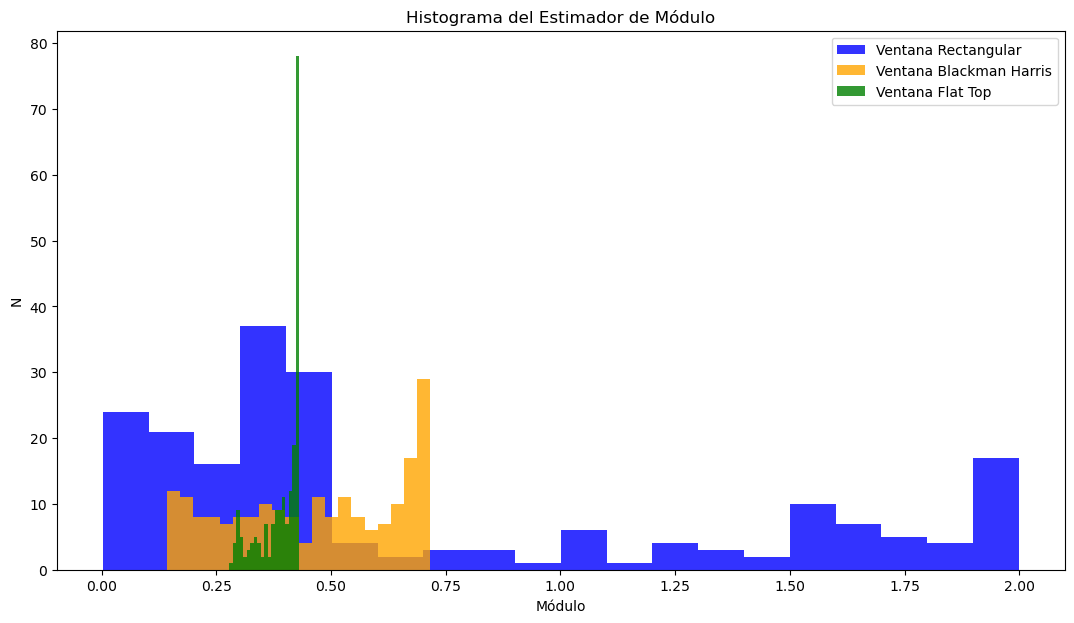

In [13]:
a_rect = 2*np.abs(ft_X_rect[N//4, :])            #Estimador de módulo ventana rectangular
a_blackman = 2*np.abs(ft_X_blackman[N//4, :])    #Estimador de módulo ventana Blackman Harris
a_flattop = 2*np.abs(ft_X_flattop[N//4, :])      #Estimador de módulo ventana Flat Top

print("Sesgo ventana rectangular: " + str(np.mean(a_rect) - a1))
print("Varianza ventana rectangular: " + str(np.var(a_rect)) + "\n")
print("Sesgo ventana Blackman Harris: " + str(np.mean(a_blackman) - a1))
print("Varianza ventana Blackman Harris: " + str(np.var(a_blackman)) + "\n")
print("Sesgo ventana Flat Top: " + str(np.mean(a_flattop) - a1))
print("Varianza ventana Flat Top: " + str(np.var(a_flattop)) + "\n")

plt.figure()
plt.hist(a_rect, bins=20, alpha=0.8, label='Ventana Rectangular', color='blue')
plt.hist(a_blackman, bins=20, alpha=0.8, label='Ventana Blackman Harris', color='orange')
plt.hist(a_flattop, bins=20, alpha=0.8, label='Ventana Flat Top', color='green')
plt.title('Histograma del Estimador de Módulo')
plt.xlabel('Módulo')
plt.ylabel('N')
plt.legend()
plt.show()

### Se observa que tanto la ventana Blackman Harris como la Flat Top poseen mucha menor varianza que la ventana rectangular pero con un sesgo mayor. Sin embargo, al ser este un error sistemático, se puede corregir para obtener una estimación más precisa del módulo.